# Linear Regression in Deep Learning

In [1]:
import numpy as np
import torch

In [ ]:
inputs = np.array([
          [73, 67, 43],
          [91, 88, 64],
          [87, 134, 58],
          [102, 43, 37],
          [69, 96, 70]], dtype='float32')

In [7]:
inputs.shape

(5, 3)

In [5]:
targets = np.array([[56, 70],
                   [81, 101],
                   [119, 133],
                   [22 , 37],
                   [103, 119]], dtype='float32')

In [8]:
targets.shape

(5, 2)

### convert to tensor

In [ ]:
inputs = torch.from_numpy(inputs)

In [15]:
targets = torch.from_numpy(targets)

In [16]:
print(f'Inputs Shape : {inputs.shape}')
print(f'Targets Shape : {targets.shape}')

Inputs Shape : torch.Size([5, 3])
Targets Shape : torch.Size([5, 2])


In [17]:
type(inputs)

torch.Tensor

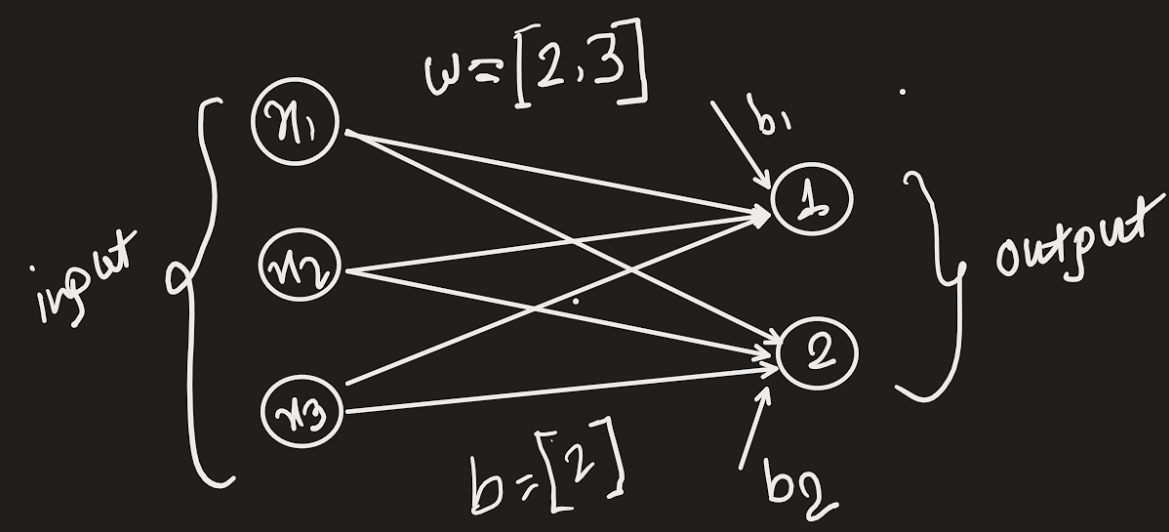

### Initilize / Define Weights & Biases

In [23]:
w = torch.randn(2,3,requires_grad=True)
b = torch.randn(2, requires_grad=True)

In [24]:
w

tensor([[ 1.2569,  0.6084,  0.1454],
        [ 0.8432,  1.4353, -0.4898]], requires_grad=True)

In [26]:
b

tensor([ 0.0584, -0.6393], requires_grad=True)

In [27]:
w.shape

torch.Size([2, 3])

In [28]:
b.shape

torch.Size([2])

### generate predictions

In [31]:
# define models, 
def model(x):
    calculation = x @ w.t() +b
    return calculation; 

In [32]:
prediction = model(inputs)
prediction

tensor([[138.8240, 136.0196],
        [177.2774, 171.0533],
        [199.3616, 236.6446],
        [159.8003, 128.9627],
        [155.3656, 161.0472]], grad_fn=<AddBackward0>)

In [41]:
# MSE loss, 
def mse(y,y_pred):
    diff = (y-y_pred)
    return torch.sum(diff*diff)/ diff.numel()

In [42]:
# loss, 
loss = mse(targets,prediction)
loss

tensor(7455.1562, grad_fn=<DivBackward0>)

In [43]:
loss.backward()

In [44]:
w.grad

tensor([[7893.5415, 7148.5151, 4629.6719],
        [6498.5630, 6493.4624, 3935.9131]])

In [45]:
b.grad

tensor([89.9258, 74.7455])

In [ ]:
# make zero reset, 
w.grad.zero_()

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [47]:
b.grad.zero_()

tensor([0., 0.])